### • Business Understanding

•	**Introduction:** This project involves working with a consolidated dataset compiled from census data in the USA to build a regression model. Through data exploration, cleaning, and appropriate univariate feature selection, the objective is to create a model that accurately predicts the mortality rate on unseen data. The resulting model can be used to gain insights into the relationships between different variables and inform decision-making processes.

•	**Dataset:** Regression analysis on US census data (comparising various 33 freatures informaiton about US counties), following are the datasets.

        Training set: cancer_us_county-training.csv
        Testing set: cancer_us_county-testing

•	**Business Problem:** Build a Univariate Linear Regression model that can make precise predictions about cancer mortality rates, utilizing data related to counties in the United States, with focus on the usefulness of any individual feature.


The subsequent activities are performed for this Univariate Linear Regression. 

• Business Understanding

• Data Understanding

        1] Loading Data
        2] Exploring Data
        3] Analysing Relationship between Target and Independent Feature

• Data Preparation

        4] Selecting Target and Independent Feature
        5] Splitting Data into Training, Validation and Testing Sets

• Modeling

        6] Assessing Baseline Performance
        7] Training Univariate Linear Regression Model

• Model Evaluation

        8] Analysing Model Performance
    
• Summary and Deployment Suggestion

In [1]:
# Importing required Python libraries
import numpy as np
import pandas as pd

# Importing SKLearn libaries and Linear Regression ML Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# Importing required Data Visualization libraries
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Importing other formatting libraries
from quo import echo
import warnings

In [2]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings("ignore")

### • Data Understanding

#### 1] Loading  Data

In [3]:
# Creating variable named file_url to hold the path for csv data files. Note: Change this path to the appropriate path of file location for successful loading of data.
file_url = '/Users/monalipatil/Monali/MDSI-Semester1/Machine Learning Algorithms and Applications/Assignment1/'

# Loading training and testing data into pandas separate dataframes namely 'df_train' and 'df_test'. 
df_train = pd.read_csv(file_url + 'cancer_us_county-training.csv')
df_test = pd.read_csv( file_url + 'cancer_us_county-testing.csv')

#### 2] Exploring Data

• Checking some datapoints of the dataset. 

In [4]:
# Displaying first 5 rows of the training dataset. 
df_train.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4


In [5]:
# Displaying sample/any 5 rows of the training dataset. 
df_train.sample(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
2231,9.0,3,137.6,338.6,62010,1846,10.6,0.000000,"(61494.5, 125635]",48.5,...,41.4,27.0,7.8,92.523364,0.329852,0.164926,1.209456,66.161616,15.434084,2788
1652,40.0,17,161.0,389.8,46394,7758,14.9,128.899201,"(45201, 48021.6]",38.9,...,37.1,35.4,22.5,92.155388,4.185464,0.313283,2.130326,51.681652,13.233288,2054
1937,88.0,40,178.6,416.1,41101,13801,16.5,0.000000,"(40362.7, 42724.4]",49.3,...,37.0,47.6,21.6,96.250450,0.460597,0.582944,0.690896,52.922405,3.797949,2420
893,411.0,151,182.6,508.6,59831,60641,10.0,329.809865,"(54545.6, 61494.5]",46.1,...,48.6,33.9,16.8,96.389013,0.543055,1.066243,0.322853,53.360166,4.824423,1129
198,383.0,136,165.4,491.9,45807,54659,12.9,18.295249,"(45201, 48021.6]",47.4,...,36.7,37.7,18.1,96.657397,0.481174,0.900143,0.075012,49.677896,5.103570,253


•	Checking dimension of the datasets.

In [6]:
# Describing the number of rows and columns/shape from both datasets.
print(df_train.shape)
print("\nThus, the training dataset consist of:")
print("Rows: {}".format(df_train.shape[0]))
print("Columns: {}".format(df_train.shape[1]))

print("\n\n", df_test.shape)
print("\nThus, the testing dataset consist of:")
print("Rows: {}".format(df_test.shape[0]))
print("Columns: {}".format(df_test.shape[1]))

(2438, 35)

Thus, the training dataset consist of:
Rows: 2438
Columns: 35


 (609, 35)

Thus, the testing dataset consist of:
Rows: 609
Columns: 35


•	Identifying attributes names. 

In [7]:
# Checking attributes of the dataset.
df_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

•	Describing summary information of the dataset.

In [8]:
# Checking attributes summary information(features datatypes) of the dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

#### Observation: 
* In the dataset, most attributes are of an integer(int64), decimal(float) data type and two are of string/character(object) data type.

•	Checking summary statistics of the dataset.

In [9]:
# Describing the summary statistics the dataset Note: Only integer datatype's variables summary is described by default.
df_train.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,45.053173,5.217646,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,37.800000,36.400000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,44.075000,42.500000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


In [10]:
# Describing summary statistics for all datatype variables of the dataset.
df_train.describe(include='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40362.7, 42724.4]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,NaN,45.313782,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,NaN,45.053173,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,NaN,37.800000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,NaN,41.000000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,NaN,44.075000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000


• Inspecting if any null values in the dataset.

In [11]:
# Checking if any null values in the training dataset.
df_train.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1826
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          122
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     500
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

#### Observation: 

* There are three numerical features in the training dataset with significant amount of missing values comprising 'PctSomeCol18_24', 'PctEmployed16_Over' and 'PctPrivateCoverageAlone'. Since machine learning linear algorithms cannot handle missing value in continuous/any attributes, we must either handle these missing values or remove the columns altogether.

* The 'PctSomeCol18_24' feature denotes the percentage of individuals aged between 18 and 24 years who have attained some college education. However, since more than 70% of the records have missing values in this column (only 612 recorded out of 2438), it is impractical to fill them with mean values. Therefore, removing this feature from both the dataset.

* For the rest two columns 'PctEmployed16_Over' and 'PctPrivateCoverageAlone', substituting null values with its mean value. 

In [12]:
# Dropping 'PctSomeCol18_24' column from both datasets as it has higher number of nulls values. 
df_train.drop(['PctSomeCol18_24'], axis=1, inplace=True) 
df_test.drop(['PctSomeCol18_24'], axis=1, inplace=True)

# Filling null values from 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns with its mean value of the training dataset.
df_train['PctEmployed16_Over'].fillna(df_train['PctEmployed16_Over'].mean(), inplace=True)
df_train['PctPrivateCoverageAlone'].fillna(df_train['PctPrivateCoverageAlone'].mean(), inplace=True)

• Checking if any missing values in the dataset.

In [13]:
# Checking if any missing values in the trainng dataset.
df_train.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

<Axes: >

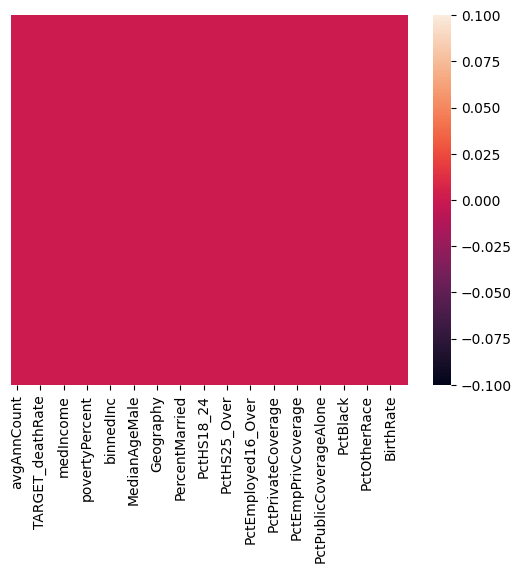

In [14]:
# Generating heatmap is another method to check missing values in the dataset. 
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=True)

• Examining if any duplicate values in the dataset.

In [15]:
# Examining if any duplicate values in the training dataset.
df_duplicate_rows = df_train[df_train.duplicated()]
print("The number of duplicate rows in the training dataset:", df_duplicate_rows.shape)

The number of duplicate rows in the training dataset: (0, 34)


#### Observation: 

* After replacing null values with mean, there are no missing values in the dataset as indicated in the heatmap. 

#### 3] Analysing Relationship between Target and Independent Feature

<Axes: >

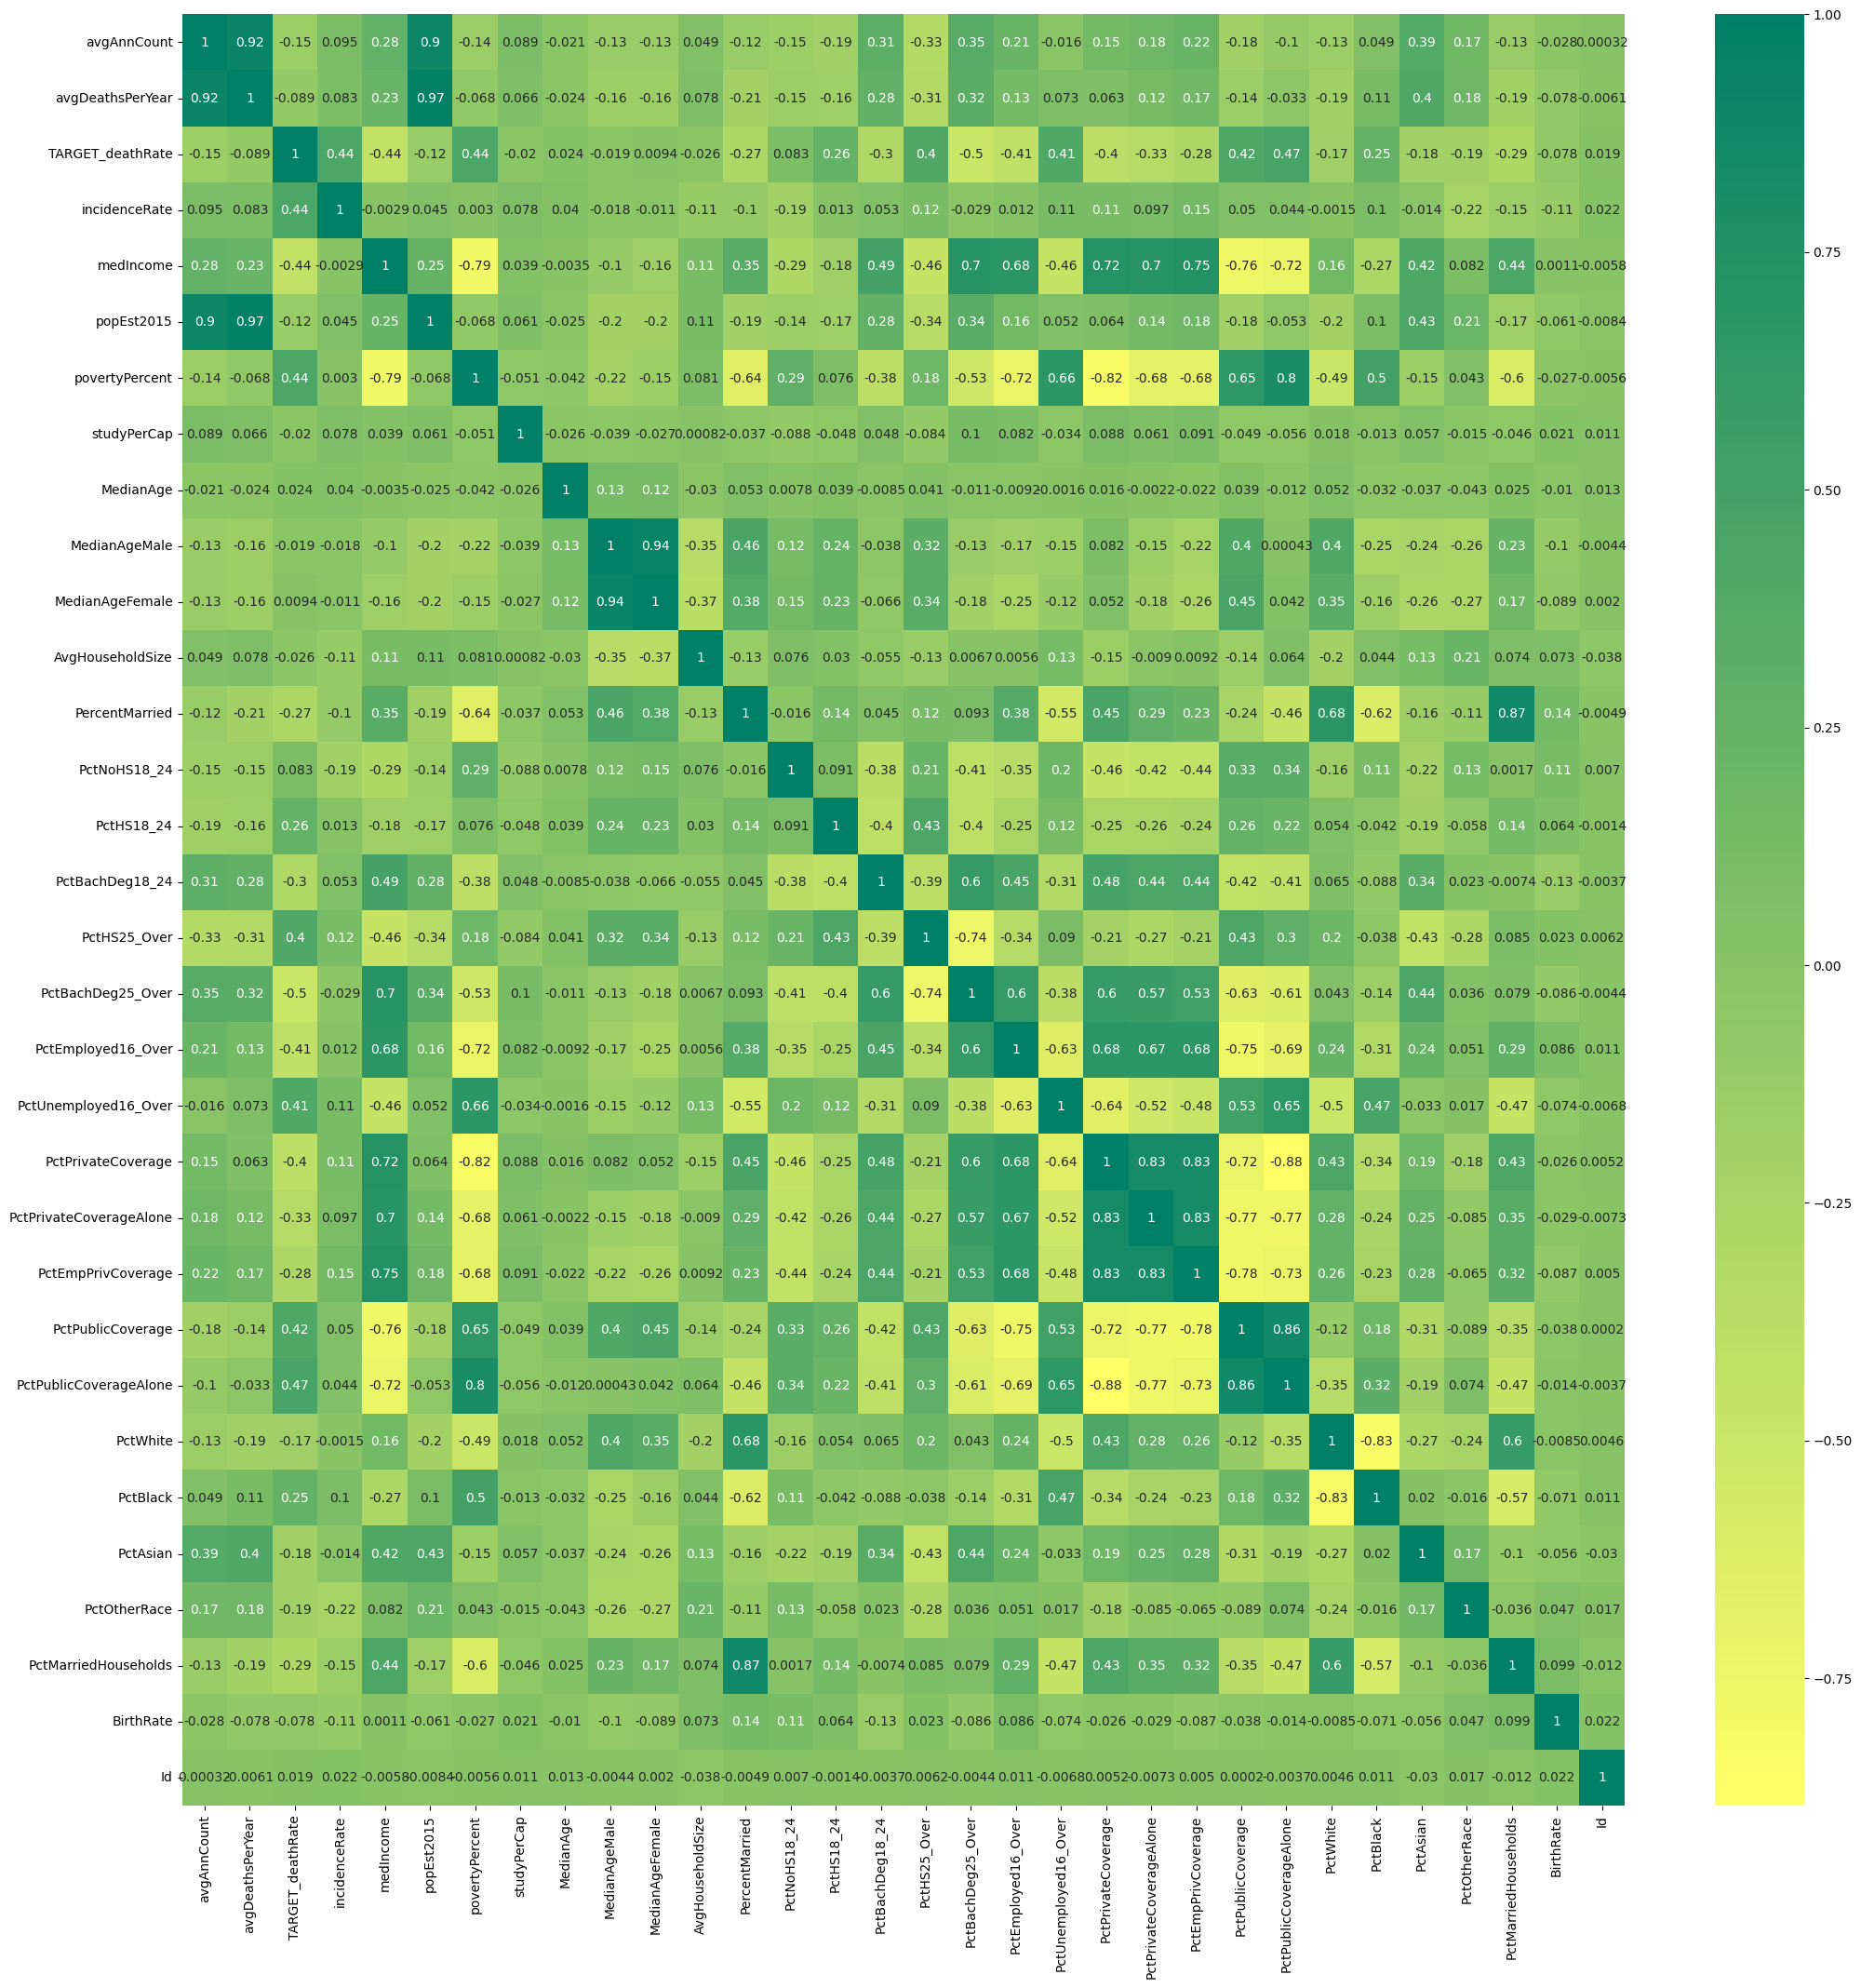

In [16]:
# Plotting Heatmap for Correlation between target 'TARGET_deathRate' variable and different attributes of the dataset. Note: Higher the value more correlated the two variables are. 
plt.figure(figsize=(25, 25))
sns.heatmap(df_train.corr(), annot=True, cmap='summer_r')

#### Observation: 

* After examining the heatmap and identifying the attributes with the strongest connection, it appears that of all numerical features, 'incidenceRate' and 'povertyPercent' have a correlation of 0.44, while 'PctPublicCoverageAlone' has a correlation of 0.47. 

* As all of these attributes show a high degree of correlation with the selected target 'TARGET_deathRate' variable, lets further analyse their data distribution more closely in order to determine the probably appropriate feature as a predictor for our univariate linear regression algorithm.

• Checking the distribution of the chosen numerical features. 

In [17]:
# Extracting only 3 continuous/numerical features from the dataset to be used to check its data distribution. 
df_continuous_features = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone']]

# Ensuring its dimension.
df_continuous_features.shape

(2438, 3)

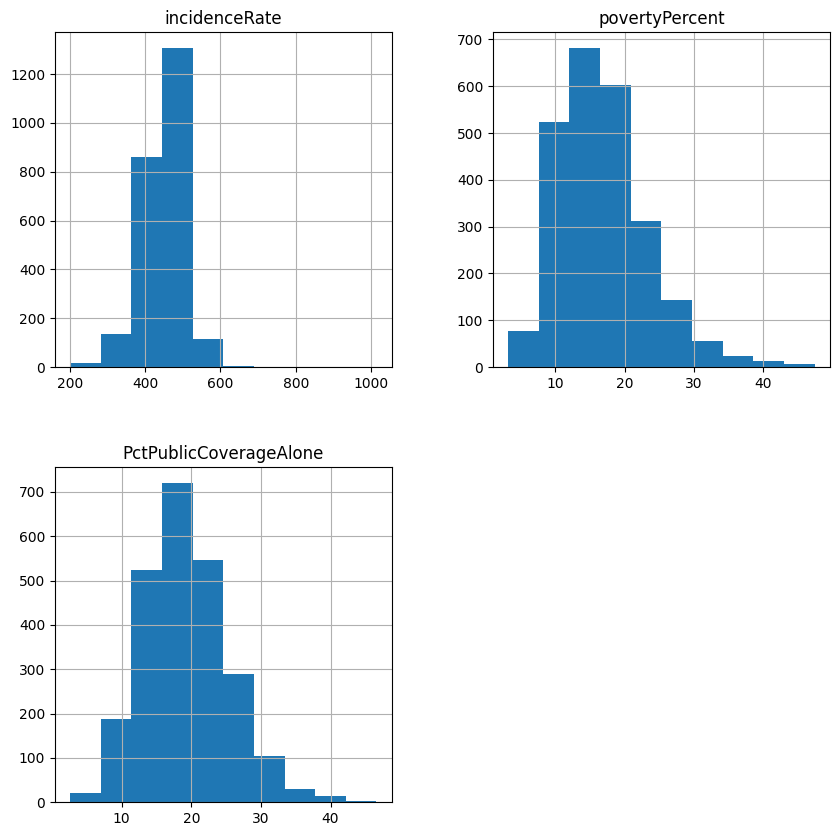

In [18]:
# Creating histogram of the selected numerical features.
histogram = df_continuous_features.hist(figsize=(10,10))

• Examining outliers present in the selected continuous features.

<Axes: xlabel='PctPublicCoverageAlone'>

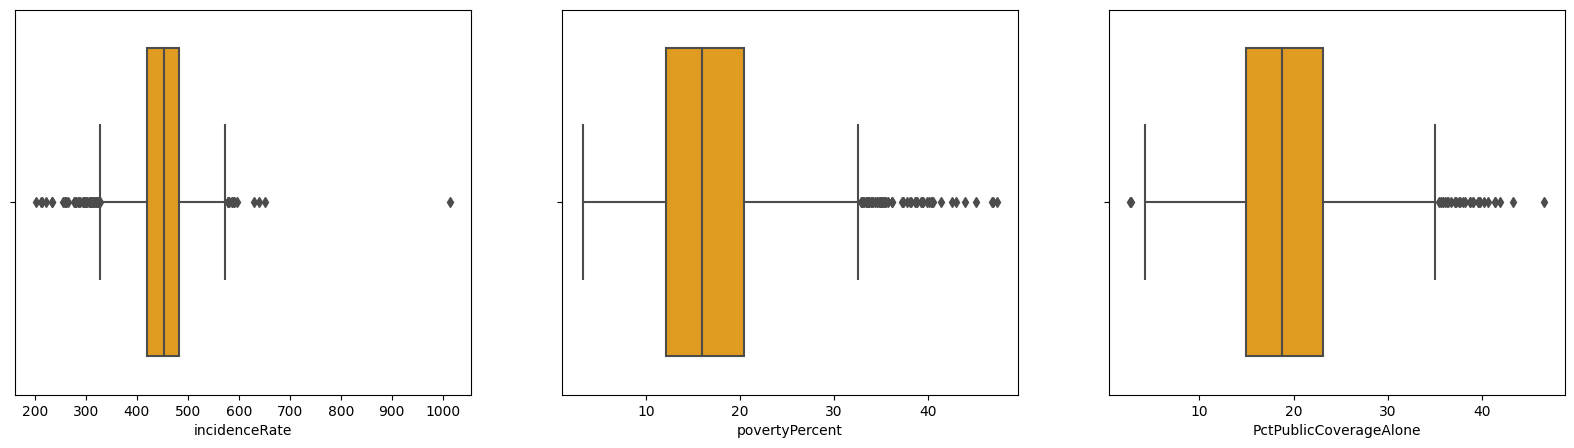

In [19]:
# Detecting outliers in the selected numerical features.
# Graph settings for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

# Ploting box graphs for 'incidenceRate', 'povertyPercent', and 'PctPublicCoverageAlone' attributes.
sns.boxplot(x='incidenceRate', data=df_continuous_features, ax=axes[0], color='orange')
sns.boxplot(x='povertyPercent', data=df_continuous_features, ax=axes[1], color='orange')
sns.boxplot(x='PctPublicCoverageAlone', data=df_continuous_features, ax=axes[2], color='orange')

• Checking the data distribution of the chosen numerical features with the target 'TARGET_deathRate' variable. 

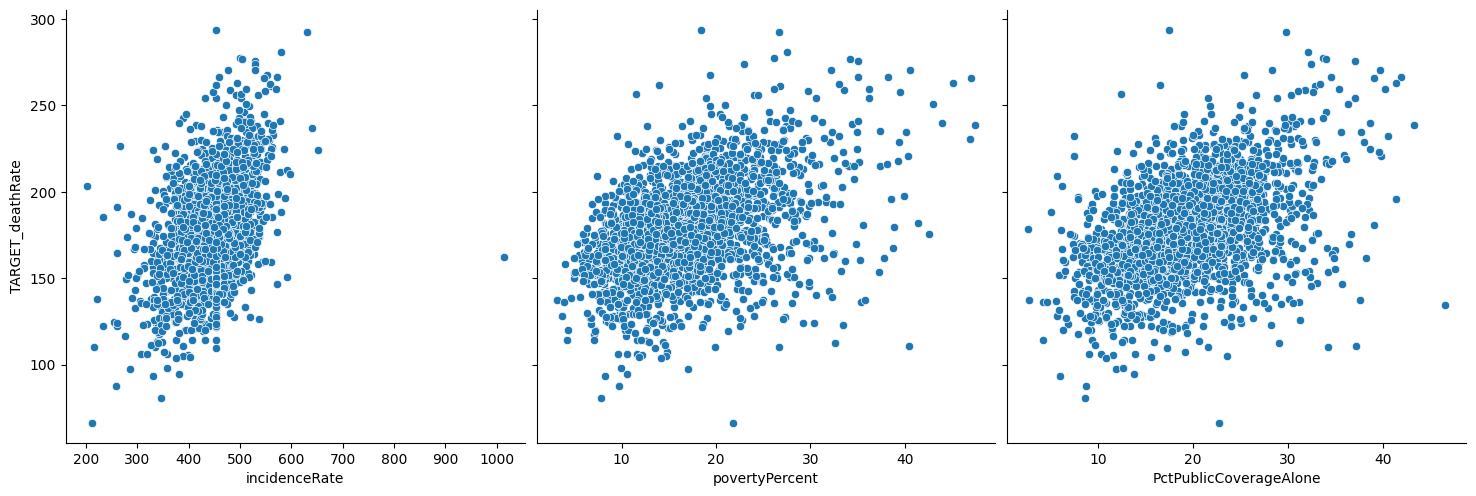

In [20]:
# Plotting the datapoints of the chosen features in relation with target 'TARGET_deathRate' variable.
sns.pairplot(df_train, x_vars=['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone'], y_vars='TARGET_deathRate', height=5)

#### Observation: 

* Based on the pairplot graph shown above, it appears that all of the three selected continuous variables have a relatively linear relationship with the 'TARGET_deathRate' target variable. However, if we were to draw a straight line for 'incidenceRate' attribute against the target variable, it would fit more closely to its data points compared to the other two features.

* In addition, the 'incidenceRate' variable has fewer outliers in comparison to the rest two features.

* Generally speaking, greater number of cancer cases that are recorded and diagnosed will result in a more positive interpretation of the mortality rate. 

* Therefore, selecting 'incidenceRate' as an independent feature.

### • Data Preparation

Note: During the initial data exploration phase, the data is processed and readied for the algorithm use.

#### 4] Selecting Target and Independent Feature

In [21]:
# Extracting values for independent 'incidenceRate' and dependent 'TARGET_deathRate' feature for training model.
X = df_train['incidenceRate'].values
y = df_train['TARGET_deathRate'].values

# Extracting values for independent 'incidenceRate' and dependent 'TARGET_deathRate' feature for testing model.
X_test = df_test['incidenceRate'].values
y_test = df_test['TARGET_deathRate'].values

#### 5] Splitting Data into Training, Validation and Testing Sets

In [22]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 19)

#### Observation: 

* By creating a validation set, it gives freedom to conduct several experiments, as multiple experiments can be run on model using this set. On the other hand, the testing set should only be used a few times. Therefore, splitting the training set (ratio of 90:10) into a validation set, to leverage more flexibility for experimentation. 

* Although Univariate Linear Regression is being used for learning purposes, it is appropriate because both the target variable, 'TARGET_deathRate,' and independent variable, 'incidenceRate,' are continuous and have the potential to take upto infinite values. Therefore, Univariate Linear Regression is a suitable choice of model.

### • Modeling

#### 6] Assessing Baseline Performance

In [23]:
# Creating a 'y_mean' variable with mean/average value of the target variable.
y_mean = y_train.mean()

# Creating array named 'y_base' of same dimension as target variable with above 'y_mean' value.
y_base = np.full(y_train.shape, y_mean)

# Calculating the sum of errors, MSE and MAE between the target variable and its average value. 
echo(f'\nBaseline Performance Score:', underline=True) 
print('Sum of Errors:', (y_base - y_train).sum())
print('MSE:', mse(y_train, y_base, squared=True))
print('MAE:', mae(y_train, y_base))
print('RMSE:', mse(y_train, y_base, squared=False))


Baseline Performance Score:
Sum of Errors: -3.5697667044587433e-11
MSE: 744.5850818154925
MAE: 21.183654351928563
RMSE: 27.287086356287517


#### 7] Training Univariate Linear Regression Model

• Instantiating the LinearRegression class

In [24]:
# Creating an object named 'regmodel' from the instantiation of the LinearRegression class imported from sklearn library.
regmodel = LinearRegression() 

• Fitting the linear regression model using a single independent variable.

In [25]:
# Training the linear regression model with selected 'incidenceRate' independent variable.
regmodel.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

• Predicting the values for the target variable using above trained model.

In [26]:
# Predicting the ('TARGET_deathRate') values for ('incidenceRate') independent feature employing above trained univariate regression model 
# and storing the result in 'y_train_predict' variable.
y_train_predict = regmodel.predict(X_train.reshape(-1, 1))

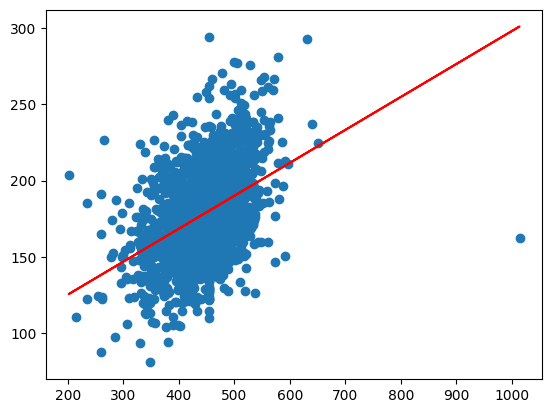

In [27]:
# Displaying graph that compares predicted values with actual values for the training set.
plt.scatter(X_train, y_train) 
plt.plot(X_train, y_train_predict, color='red')
plt.show()

• Assessing the performance metrics for the training set.

In [28]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Sum of Errors:', (y_train_predict - y_train).sum())
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
Sum of Errors: -2.660272002685815e-11
MSE: 612.8900118006753
MAE: 19.349880208784445
RMSE: 24.756615515871214


#### Observation: 

* The earlier established baseline performance acts as the simplest model that always predicts the same baseline value which helps to evaluate the performance of our univariate linear regression model and ensure that we are making progress in the right direction.

* The MSE, RMSE and MAE performance for the training set, mentioned above, is better than the baseline. Now let's proceed to predicting values on the validation set and assessing its performance.

• Predicting on validation set utilizing the above trained model.

In [29]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = regmodel.predict(X_validate.reshape(-1, 1))

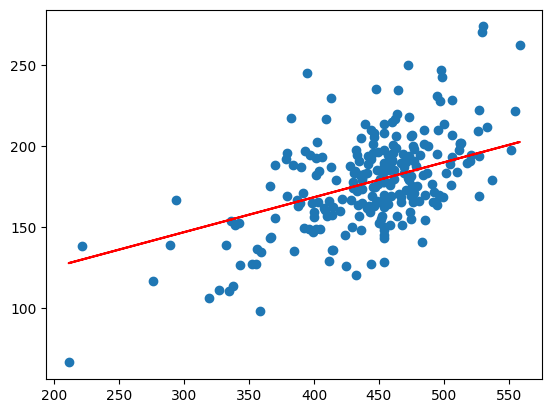

In [30]:
# Showing graph with comparison between the predicted values and actual values for the validation set.
plt.scatter(X_validate, y_validate) 
plt.plot(X_validate, y_validate_predict, color='red')
plt.show()

• Evaluating the performance metrics for the validation set.

In [31]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 614.1857192318929
MAE: 19.202780240641175
RMSE: 24.782770612502002


#### Observation: 

* There is a minor difference between the MSE, RMSE and MAE scores of the training and validation sets.

### • Model Evaluation

#### 8] Analysing Model Performance

• Assessing the performance of the model using the testing set.

In [32]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = regmodel.predict(X_test.reshape(-1, 1))

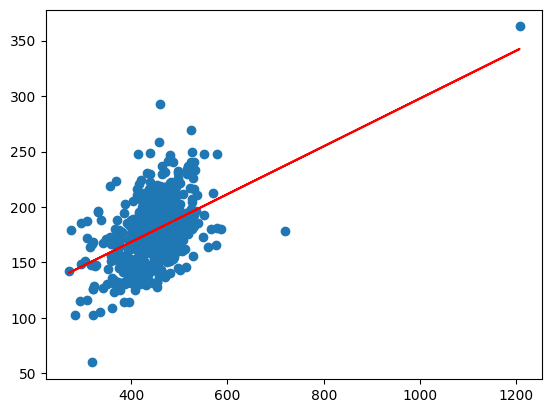

In [33]:
# Displaying graph with comparison between the predicted values and actual values for the testing set.
plt.scatter(X_test, y_test) 
plt.plot(X_test, y_test_predict, color='red')
plt.show()

• Assessing the performance metrics for the testing set.

In [34]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 622.4880058723813
MAE: 19.741296964828827
RMSE: 24.949709534829886


### • Summary and Deployment 

* The MSE calculates the average of the squared differences between the predicted and actual values. Since the unit of values are doubled, the error is emphasised. Therefore, to mitigate this effect, the RMSE is used for evaluation below, which cancels out the squaring effect and brings the unit of measurement back to its original scale.

* As the difference between the RMSE scores of the training (24.7566), validation (24.7827), and testing (24.9497) sets are relatively small, it suggests that the model is performing consistently across the three sets and is not overfitting to the training data and this univariate linear regression model with single 'incidenceRate' independent feature is generalizing well to new/unseen data.

* However, further it is important to evaluate other metrics and perform additional analyses such as examining the cross-validation and comparing the model's performance to other models and with expected business benchmarks before considering it to deploy in the operational environment.
